# Методы Монте-Карло - МК, Monte Carlo
>Теперь посмотрим на первые методы обучения для оценивания функций ценности и нахождения оптимальных стратегий. В отличие от методов ДП, мы теперь будем предполагать, что у нас отсутствует полная информация об окружающей среде. Т.о. МК - методы обучения на **<font color='orange'>реальном опыте</font>**. Великолепие такого рода методов (не только МК), что обучение все равно позволяет достичь оптимального поведения без каких-либо априорных знаний о динамике среды. Даже обучение на имитированном опыте приносит весьма приличные результаты. Хотя некоторая модель все же требуется - для генерации выборочных переходов. Но точное распределение вероятностей знать не нужно.

Методы Монте-Карло – это способ решения задачи обучения с подкреплением на основе усреднения выборочного полного дохода. Иначе говоря, это статистические методы нахождения приближенных решений на основе случайной выборки. Они производят выборку и усреднение доходов для каждой пары $(s,a)$. Однако теперь, в отличие от многоруких бандитов, состояний несколько и доход после выбора действия в одном состоянии зависит от действий, выбранных в более поздних состояниях того же эпизода.

Здесь мы посмотрим только на эпизодический вариант МК, т.е опыт разделен по эпизодам, а эпизод всегда завершается. И только по завершении эпизода производятся все расчеты.

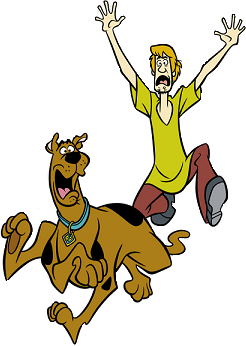

Поскольку любой выбор действия – это замаскированное обучение, то задача оказывается нестационарной с точки зрения предшествующего состояния. Чтобы справиться с нестационарностью, мы адаптируем идею обобщенной итерации по стратегиям (ОИС). Там мы вычисляли функции ценности, зная динамику МППР, а здесь мы будем обучать функции ценности на выборочных доходах в МППР.

## Оценивание ценности состояний (предcказание или оценивание стратегии ради ценности состояний)
>Напомним, что **<font color='orange'>ценность состояния – это ожидаемый доход</font>** (ожидаемое накопленное будущее обесцененное вознаграждение) **<font color='orange'>при старте из этого состояния</font>**. Тогда очевидный способ его оценки на опыте - **<font color='orange'>усреднить доходы, наблюдавшиеся после посещения этого состояния</font>**. Т.е. ценность состояния для нас тем выше, чем выше доход после его посещения. По мере увеличения количества наблюдавшихся доходов среднее должно сходиться к **<font color='orange'>математическому ожиданию</font>**. Эта идея лежит в основе
всех методов Монте-Карло.

Рассмотрим, **<font color='orange'>как вычислить функцию ценности состояния $v_π$ для произвольной стратегии $π$</font>**.

Нам потребуется оценить $v_π(s)$ при следовании стратегии $π$. Нам дано множество эпизодов, полученных в результате следования $π$ с прохождением через $s$. Каждое вхождение состояния $s$ в эпизод называется **<font color='orange'>посещением $s$</font>**. Разумеется, $s$ можно посещать несколько раз в одном эпизоде. Тогда первый случай его посещения в эпизоде - **<font color='orange'>первое посещение $s$</font>**.

**<font color='orange'>Метод МК первого посещения</font>** оценивает $v_π(s)$ как среднее доходов, полученных после первого посещения $s$. А **<font color='orange'>метод МК всех посещений</font>** усредняет доходы, полученные после всех посещений $s$.

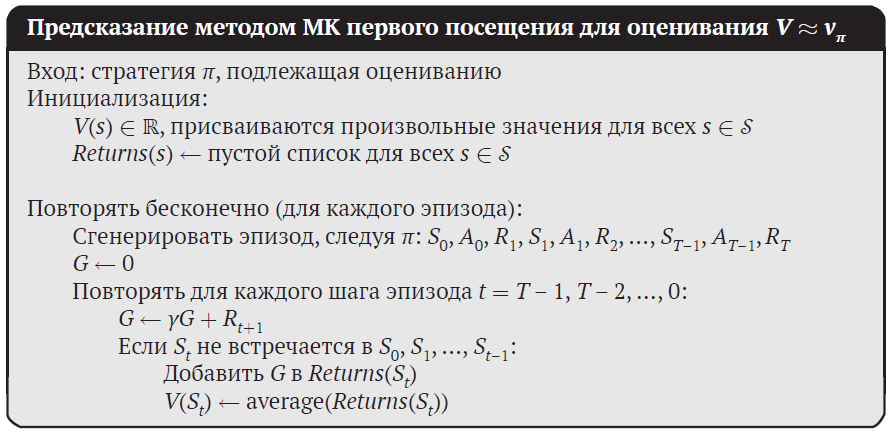

Метод МК всех посещений схож, за исключением отсутствующей строчки с проверкой:  встречалось ли состояние $S_t$ ранее в этом эпизоде.

И МК первого посещения, и МК всех посещений сходятся к $v_π(s)$, когда количество посещений (или первых посещений) $s$ стремится к бесконечности. В данном случае все доходы – независимые и одинаково распределенные оценки $v_π(s)$ с конечной дисперсией. А по закону больших чисел, последовательность средних этих оценок сходится к их математическому ожиданию.

Дополнительно в данном алгоритме приведено упрощение: усреднение $Returns(s)$, тогда как в натуральном МК должно было бы быть $V(S_t)+α[G-V(S_t)]$. В данном случае упрощение работает, хотя и не всегда используется на практике.

###### Пример №1. Блэкджек

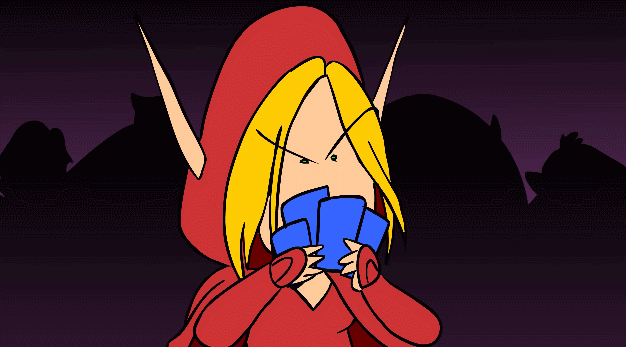

Цель популярной в казино карточной игры блэкджек – **<font color='orange'>собрать карты, сумма числовых достоинств которых как можно ближе к $21$, но не превышает этого значения</font>**. Значения очков каждой карты: от двойки до десятки - от $2$ очков до $10$ соответственно, туз - $1$ или $11$, т.н. картинки (король, дама, валет) - $10$ очков.

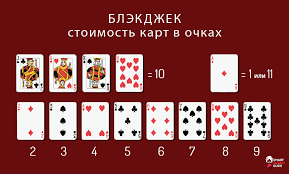

Мы рассмотрим ситуацию, когда **<font color='orange'>агент независимо играет против крупье</font>** (т.е. другие игроки не рассматриваются). В начале игры на руки игроку и крупье выдаются по $2$ карты. Крупье кладет одну карту лицом вверх, другую - лицом вниз. Если у агента сразу после сдачи на руках $21$ очко (туз + картинка или $10$), то это называется **<font color='orange'>"блэкджек"</font>**. Если у крупье в этом случае нет "блэкджека", то агент выигрывает. В противном случае ситуация называется **<font color='orange'>"ровно" или "пуш"</font>**, т.е. ничья. Если у агента нет "блэкджека", то он может попросить дополнительные карты, по одной - **<font color='orange'>"еще"</font>**, пока не решит, что достаточно - **<font color='orange'>"хватит"</font>**, или сумма очков не превысит $21$ - **<font color='orange'>"перебор"</font>**. Перебор означает проигрыш. Если агент говорит "хватит", то очередь переходит к крупье. **<font color='orange'>Крупье также набирает карты или останавливается в соответствии с определенной фиксированной стратегией, не допускающей выбора</font>**: он останавливается, набрав $17$ или более очков, в противном случае берет еще. Если у крупье "перебор", выигрывает агент, в противном случае итог игры зависит от того, у кого сумма очков ближе к $21$.

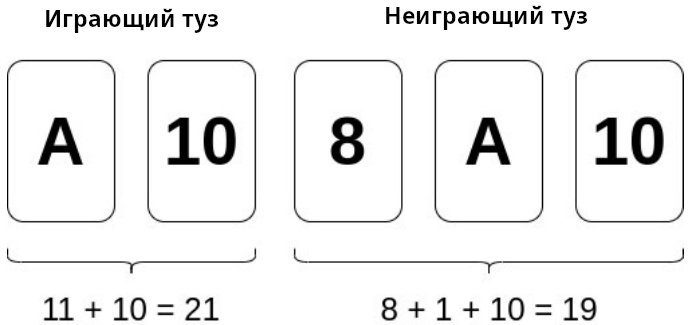

Если агент получил туза, который мог бы засчитать как $11$ без перебора, то говорят, что этот туз **<font color='orange'>играющий</font>**. В таком случае он засчитывается как $11$, поскольку при засчитывании его как $1$ сумма оказалась бы $11$ или меньше, а тогда нет никакой свободы выбора, потому что агенту, очевидно, нужно взять еще карту.

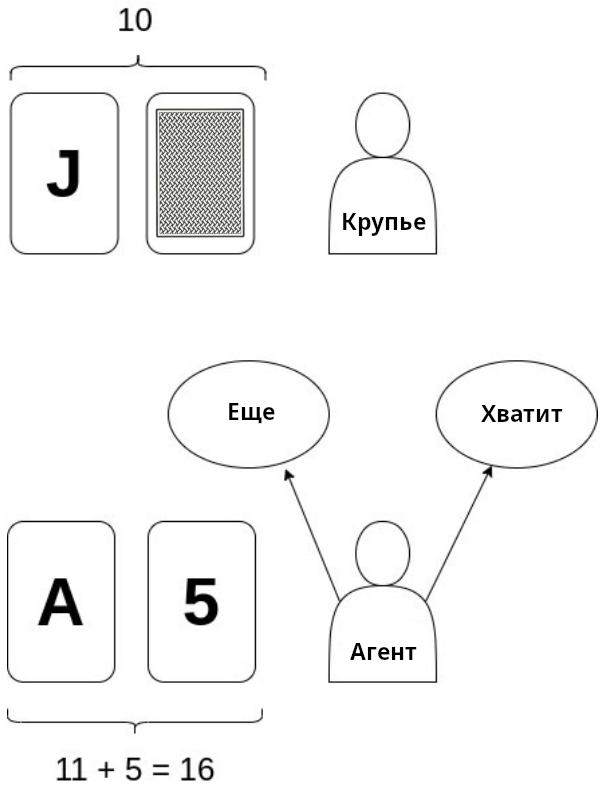

Так будет выглядеть начальное состояние каждого эпизода.

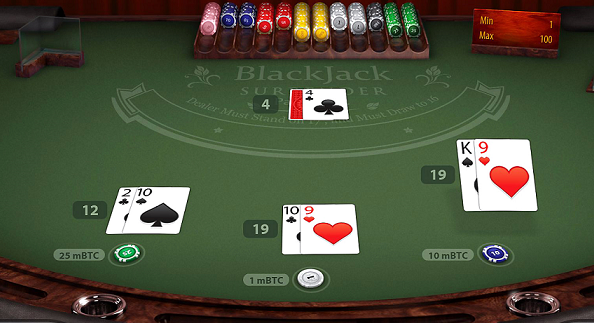

Игра в блэкджек легко представляется как **<font color='orange'>эпизодический конечный МППР</font>**. Каждая партия – отдельный эпизод. За выигрыш, проигрыш или ничью начисляется вознаграждение $+1, –1$ и $0$ соответственно. Все вознаграждения в процессе игры нулевые, обесценивания нет ($γ = 1$); поэтому вознаграждение в конце игры одновременно является доходом.

Действия агента – "еще" или "хватит". Состояния зависят от карт агента и открытой карты крупье. Предполагается, что карты сдаются из бесконечной колоды (т.е. имеет место выборка с возвращением), поэтому не имеет смысла следить за тем, какие карты уже сданы.

Таким образом, агент принимает решения, исходя из **<font color='orange'>трех переменных</font>**: своей текущей суммы очков (мы рассмотрим только $12–21$, так как сумма меньше однозначно означает "ещё"), открытой карты сдающего (в таком разрезе туз – всегда оценивается как $10$) и наличия у себя играющего туза. Всего получается $200$ состояний.

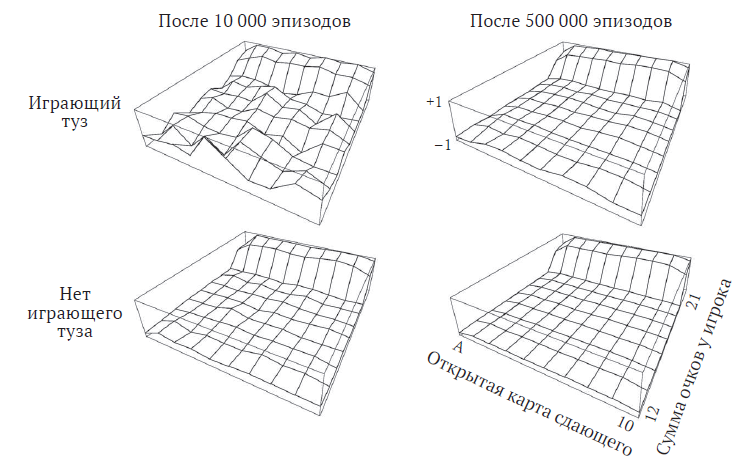

Рассмотрим стратегию, при которой агент говорит "хватит", если набрал $20$ или $21$ очко, а в противном случае просит еще карту. Здесь будет разбор двух вариантов: когда есть выбор стоимости туза (играющий туз) и когда его нет.

Чтобы найти функцию ценности состояний для этой стратегии методом Монте-Карло, необходимо **<font color='orange'>смоделировать много партий с такой стратегией и усреднить доходы</font>**, полученные после каждого состояния. Именно так получили оценки функции ценности состояний, показанные на рисунке выше. Оценки состояний с играющим тузом менее достоверны и менее регулярны, потому что такие состояния встречаются реже. Как бы то ни было, после $500 000$ партий функция ценности аппроксимирована очень хорошо.

Хотя в задаче об игре в блэкджек мы располагаем полной информацией об окружающей среде, применить методы ДП к вычислению функции ценности очень сложно. Для этого нужно знать распределение последующих событий, в частности необходима динамика среды ($p(s',r|s,a)$, а определить ее для блэкджека трудно.

Например, предположим, что агент набрал $14$ очков и хочет остановиться. Какова вероятность, что игра завершится с вознаграждением $+1$ для него, выраженная в виде функции от открытой карты крупье? Прежде чем применять ДП, требуется вычислить все вероятности, а зачастую это сложный и чреватый ошибками процесс. Напротив, сгенерировать выборочные партии, требуемые в методах Монте-Карло, легко.

**<font color='orange'>Диаграмма предшествующих состояний для оценивания $v_π$ методами МК</font>**

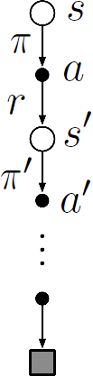

**<font color='orange'>Корнем</font>** для методов МК является **<font color='orange'>узел состояния</font>**, а под ним расположена **<font color='orange'>вся траектория переходов в одном конкретном эпизоде</font>**, заканчивающемся **<font color='orange'>в заключительном состоянии</font>**.

На диаграмме ДП показаны все возможные переходы, а на диаграмме МК – только **<font color='orange'>выборочные состояния в одном конкретном эпизоде</font>**. Диаграмма ДП включает только одношаговые переходы, а диаграмма МК продолжается **<font color='orange'>до самого конца эпизода</font>**.

Кроме этого, в методах МК важно, что оценки для каждого состояния независимы. Оценка для одного состояния не строится на основе оценки для какого-либо другого состояния(т.е.,  **<font color='orange'>в методах МК нет бутстрэппинга</font>**, мы считаем от дохода), как в случае ДП.

Также отметим, что **<font color='orange'>вычислительная сложность оценивания ценности одного состояния не зависит от количества состояний</font>**. Благодаря этому методы МК позволяют получить ценность только одного состояния или небольшого их подмножества. Можно сгенерировать большую выборку эпизодов, начинающихся в интересующих состояниях, и усреднить доходы, полученные только в этих состояниях, игнорируя все остальные.

### Обсуждение


1.  Опираясь на рисунок рассмотренной стратегии игры агента в блэкджек, попробуйте ответить на вопросы:
  *  Почему оценка функции ценности резко возрастает в последних двух делениях на задней части графика (когда сумма очков у агента $19-21$)?
  *  Почему она спадает в последней левой строке на диаграммах (когда у крупье открытая карта - туз)?
  *  Почему значения на переднем плане на верхних диаграммах выше, чем на нижних?

2.  Будет ли разница в результатах, если вместо МК первого посещения выбрать метод МК всех посещений и почему? Запрограммируйте оба алгоритма и сравните их оценки на одной стратегии из примера.



##Оценивание ценности действий
>Если модель недоступна, то особенно полезно оценивать ценность действий ($q_π(s,a)$), а не состояний ($v_π(s)$), так как последней будет недостаточно, потому что ценность состояния зависит от политики. Рассмотрим состояние в блэкджеке с суммой в $20$ очков. Какова ценность этого состояния? Для политики с "ещё" это, безусловно, плохое состояние. А вот для политики с "хватит" это определенно хорошее состояние.

Без модели необходимо явно оценить ценность каждого действия, если мы хотим, чтобы ценности были полезны для выработки стратегии. Чтобы добиться этого, мы сначала рассмотрим **<font color='orange'>задачу оценивания стратегии ради ценности действий</font>**.

Задача оценивания стратегии ради ценности действий заключается в том, чтобы оценить $q_π(s, a)$, ожидаемый доход при старте из состояния $s$, выборе действия $a$ и далее следования стратегии $π$.

Методы Монте-Карло для этой задачи по существу такие же, как и для $v_π(s)$ ценности состояний, только теперь мы говорим о посещении пары состояние–действие, а не состояния. Говорят, что пара $(s,a)$ посещалась в эпизоде, если посещалось состояние $s$ и в нем выбиралось действие $a$.

**<font color='orange'>Метод МК всех посещений</font>** оценивает ценность пары $(s,a)$ как средний доход, полученный после всех ее посещений. **<font color='orange'>Метод МК первого посещения</font>** усредняет доходы, полученные после того, как данное действие впервые было выбрано в данном состоянии. Эти методы, как и раньше, квадратично сходятся к истинным ожидаемым ценностям, когда количество посещений каждой пары $(s,a)$ стремится к бесконечности.

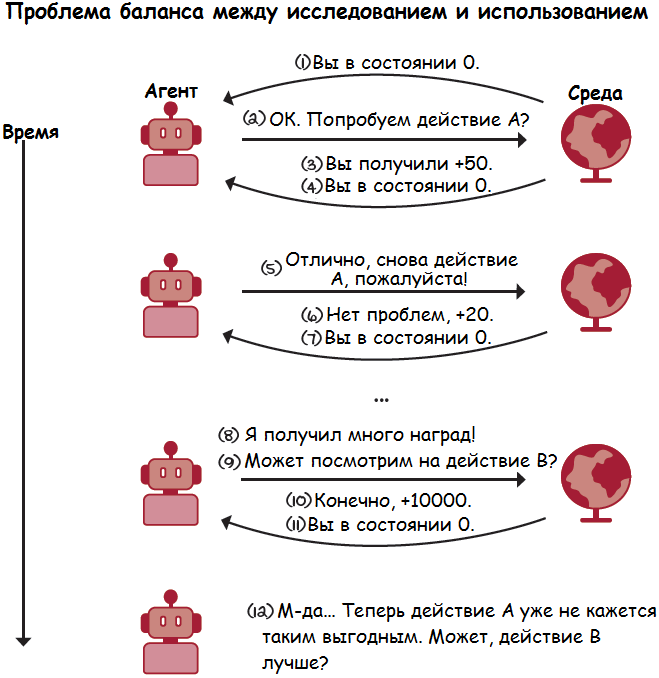

Единственная проблема в этих методах: многие пары $(s,a)$ могут быть не посещены ни разу. Если $π$ – детерминированная стратегия, то при следовании $π$ будут наблюдаться доходы, приносимые только одним конкретным действием в каждом состоянии. Раз нет доходов для усреднения, то оценки Монте-Карло других действий не будут улучшаться с опытом. Это серьезная проблема, потому что цель обучения ценностям действий – помочь сделать выбор между действиями, доступными в каждом состоянии. Чтобы сравнить альтернативы, мы должны оценить ценности всех действий в каждом состоянии, а не только того, которому мы в данный момент отдаем предпочтение в $π$.

Это общая проблема поощрения исследования, которую мы обсуждали ранее. Чтобы оценивание политики позволяло оценить ценности действий, мы должны гарантировать продолжение исследования. Один из способов добиться этого – сказать, что эпизоды начинаются в паре состояние–действие и что для любой пары вероятность быть выбранной в качестве начальной ненулевая. Это гарантирует, что все пары состояние–действие будут посещены бесконечное число раз, если количество эпизодов стремится к бесконечности. Данное предположение носит название исследовательские старты (exploring starts). Предположение об исследовательских стартах иногда полезно, но, конечно, на него нельзя полагаться в общем случае, особенно при обучении на реальном взаимодействии с окружающей средой.  

Наиболее распространенный альтернативный подход к предположению о том, что все пары состояние–действие встречаются, – рассматривать только стохастические стратегии с ненулевой вероятностью выбора любого действия в каждом состоянии.


## Вариант Монте-Карло классической итерации по стратегиям (управление)

Теперь рассмотрим, как оценивание методами МК можно использовать в управлении, т. е. для аппроксимации оптимальных стратегий.

Общая идея состоит в том, чтобы действовать по тому же образцу, что был описан в главе о ДП, т.е. **<font color='orange'>применять обобщенную итерацию по стратегиям (ОИС)</font>**. В ОИС одновременно строится приближенная стратегия и приближенная функция ценности. Функция ценности в цикле изменяется, чтобы быть ближе к функции ценности для текущей стратегии, а стратегия в цикле же улучшается относительно текущей функции ценности.

Для начала рассмотрим вариант **<font color='orange'>Монте-Карло классической итерации по стратегиям</font>**. В этом методе мы **<font color='orange'>чередуем полные шаги оценивания и улучшения стратегии</font>**, начиная с произвольной стратегии $π_0$ и заканчивая оптимальной $π_*$ и оптимальной функцией ценности действий $q_*$:

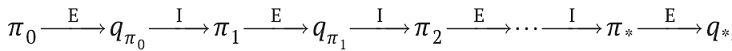

где $E$ обозначает полное оценивание стратегии, а $I$ – полное улучшение стратегии.

**<font color='orange'>Оценивание стратегии производится точно так же, как описано в предыдущем разделе.</font>**

А **<font color='orange'>чтобы улучшить стратегию, мы делаем ее жадной относительно текущей функции ценности</font>**. В данном случае мы имеем функцию ценности действий, поэтому для построения жадной стратегии никакая модель не нужна. **<font color='orange'>Для любой функции ценности действий $q$ соответствующей жадной стратегией будет такая, которая $\forall s ∈ 𝒮$	детерминированно выбирает действие с максимальной ценностью</font>**:

(1)$$π(s) = argmax_a q(s,a).$$

Таким образом, на каком-то моменте $k$ для улучшения стратегии можно построить $π_{k+1}$ как жадную стратегию относительно $q_{π_k}$. После этого к $π_k$ и $π_{k+1}$ применима теорема об улучшении стратегии (формула 6 в ДП), потому что $\forall s ∈ 𝒮$:

(2)$$q_{π_k}(s, π_{k+1}(s)) = q_{π_k}(s, argmax_a q_{π_k}(s,a)) = max_a q_{π_k}(s, a) ≥ q_{π_k}(s, π_k(s)) ≥ v_{π_k}(s).$$

Это гарантирует, что каждая стратегия $π_{k+1}$ равномерно лучше $π_k$ или так же хороша, как $π_k$, т. е. обе стратегии оптимальны. Значит, процесс сходится к оптимальным стратегии и функции ценности.

Так как данное утверждение **<font color='orange'>основано на прохождении бесконечного числа эпизодов</font>**, что является **<font color='orange'>неправдоподобным</font>**, нам необходимо устранить это условие.

Как и с классическими методами ДП, решить эту проблему можно **<font color='orange'>двумя методами</font>**.
1.   **<font color='orange'>Твердо придерживаемся идеи аппроксимации $q_{π_k}$ при каждом оценивании стратегии</font>**. Делаются измерения и предположения, необходимые для получения границ абсолютной величины и вероятности ошибки в оценках, а затем при оценивании каждой стратегии совершается столько шагов, чтобы гарантировать, что эти границы достаточно малы.
2.   Мы **<font color='orange'>отказываемся от попыток полностью оценить стратегию, перед тем как переходить к ее улучшению</font>**. На каждом шаге оценивания мы сдвигаем функцию ценности в направлении $q_{π_k}$, но не ожидаем, что подойдем к ней очень близко. Этот подход мы использовали, когда только познакомились с идеей ОИС.

Первый варинат хотя и дает гарантии аппроксимации с заданной точностью, но на практике все равно имеет слишком большое количество эпизодов.

Крайняя форма идеи второго варианта – итерация по ценности, когда **<font color='orange'>между каждыми двумя шагами улучшения стратегии выполняется только одна итерация итеративного оценивания стратегии</font>**. Еще более крайним является вариант итерации по ценности с обновлением на месте, когда мы **<font color='orange'>чередуем шаги улучшения и оценивания для отдельных состояний</font>**. Подобное мы уже разбирали ранее.





Для этого варианта МК мы применим нечто среднее. Для итерации по стратегиям в методе Монте-Карло естественно **<font color='orange'>чередовать оценивание и улучшение поэпизодно</font>**. После каждого эпизода наблюдаемые доходы используются для оценивания стратегии, а затем стратегия улучшается во всех состояниях, посещенных в этом эпизоде. Добавим сюда еще исследовательские старты.

В этом алгоритме все доходы для каждой пары $(s, a)$ накапливаются и усредняются независимо от того, какая стратегия действовала в момент их наблюдения.

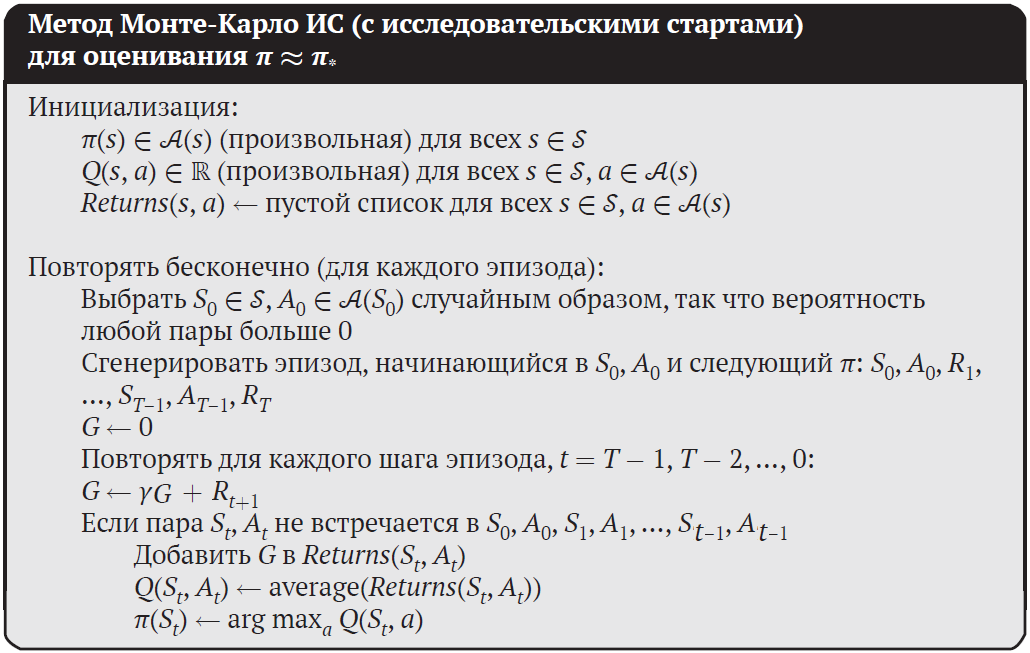

###### Пример №2. Решение задачи об игре в блэкджек.

Описанный выше алгоритм приеняется к блэкджеку прямолинейно. Поскольку эпизодами являются все смоделированные партии, **<font color='orange'>легко организовать исследовательские старты</font>**, включающие все возможности. В данном случае просто выбираются карты сдающего, сумма очков игрока и наличие у игрока играющего туза – все случайным образом с одинаковой вероятностью.

**<font color='orange'>В качестве начальной стратегии мы берем стратегию, вычисленную в предыдущем примере игры в блэкджек</font>**, при которой игрок останавливается, только набрав 20 или 21.

**<font color='orange'>Начальная функция ценности действий может быть равна нулю</font>** для всех пар состояние–действие.

Ниже приведены оптимальные стратегия и функция ценности состояний для
игры в блэкджек, найденные методом Монте-Карло ИС.

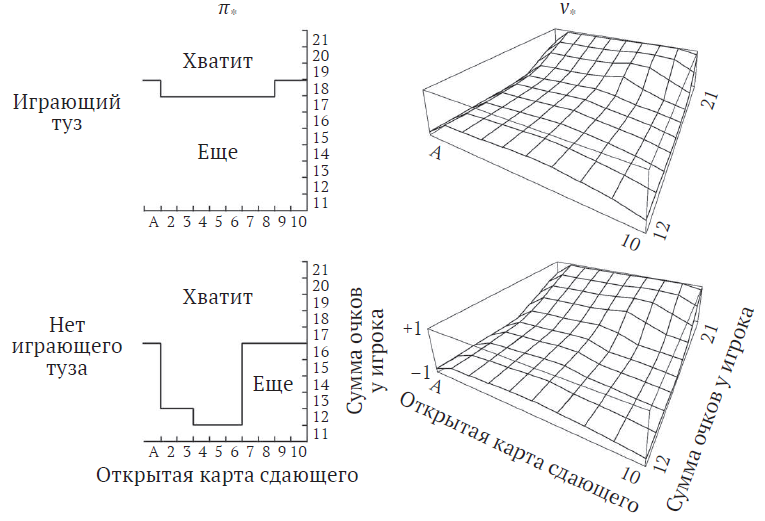

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://static.wikia.nocookie.net/allstars_gamepedia/images/8/80/ChoBase_IntroResponse_Demon00.ogg").play()')

### Обсуждение


1.   В алгоритм метода Монте-Карло ИС для оптимизации следует вместо хранения всех доходов хранить только среднее доходов и количество элементов в списке (для каждой пары состояние–действие) и обновлять их инкрементно. Такой подход описан в разделе Инкрементной реализации методички Многоруких бандитов. Указание: по аналогии с выведением $Q_{n+1}$ (формула (4)) необходимо преобразовать $Q_n(S_t, A_t) = \frac{1}{n}\sum_{i=1}^{n}G_i(S_t, A_t)$.


## Вариант Монте-Карло без исследовательских стартов (управление)
> Однако, исследовательские старты тоже являются неправдаподобным предположением, от него тоже следует избавиться.

**<font color='orange'>Единственный общий способ гарантировать, что каждое действие выбирается бесконечно часто, – заставить агента и дальше выбирать их</font>**. Таких подходов два: методы с единой стратегией (on-policy method) и методы с разделенной стратегией (off-policy method).

**<font color='orange'>Методы on-policy</font>** пытаются оценить или улучшить стратегию, которая используется для принятия решений, а **<font color='orange'>методы off-policy</font>** – оценить или улучшить стратегию, отличную от той, что использовалась для генерации данных. Метод Монте-Карло ИС, разобранный выше, это пример метода с единой стратегией.

В этом разделе разберем **<font color='orange'>метод управления Монте-Карло с единой стратегией без исследовательских стартов</font>**.

В методах управления с единой стратегией обычно применяется **<font color='orange'>мягкая стратегия</font>**, т.е. $π(a|s) > 0$ $\forall s ∈ 𝒮$ и $\forall a ∈ 𝒜(s)$, но постепенно приближается к детерминированной оптимальной стратегии. Таким образом, у любого нежадного действия есть ненулевая вероятность $\frac \epsilon {|𝒜(s)|}$ быть выбранным, а вся остальная масса вероятности, $1 – \epsilon + \frac \epsilon {|𝒜(s)|}$, распределяется между жадными действиями. Среди всех $\epsilon$-мягких стратегий $ϵ$-жадные в некотором смысле наиболее близки к жадным.

Как и в методе Монте-Карло ИС, мы **<font color='orange'>применяем методы МК первого посещения</font>** для оценивания функции ценности действий для текущей стратегии. Однако без предположения об исследовательских стартах мы не можем просто улучшить стратегию, сделав ее жадной относительно текущей функции ценности, потому что это остановило бы дальнейшее исследование нежадных действий. По счастью, **<font color='orange'>ОИС не требует, чтобы стратегия совпадала с жадной, нужно лишь, чтобы она постепенно приближалась к таковой</font>**, что позволяет использовать $ε$-мягкую стратегию. **<font color='orange'>Для любой $ε$-мягкой стратегии $π$ гарантируется, что любая $ε$-жадная стратегия относительно $q_π$ будет лучше или равна $π$.</font>**

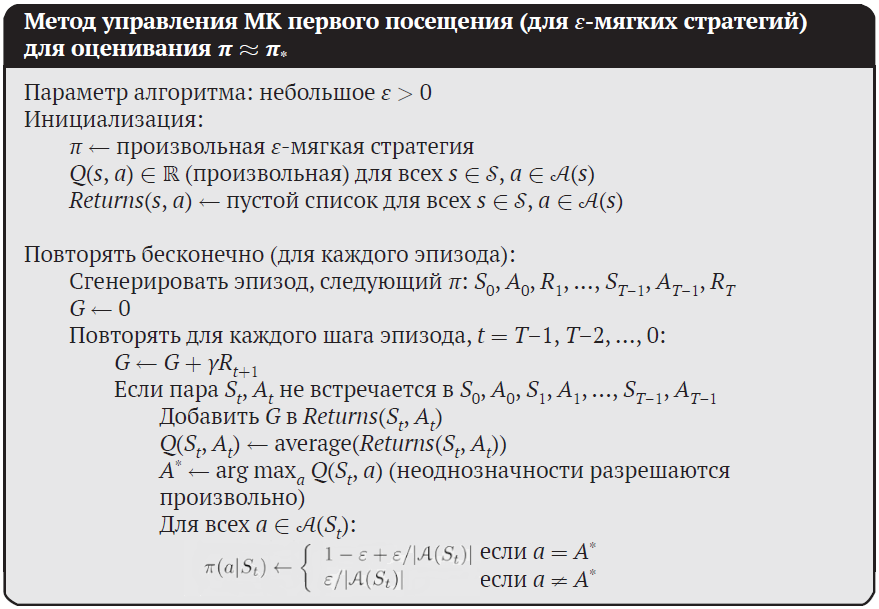

Прямое доказательство мы рассматривать сейчас не будем, все производится через ту же теорему об улучшении стратегии с использованием взвешенного среднего. ОИС работает для $ε$-мягких стратегий.

###### Код для блэкджека

Здесь представлен код среды для игры в блэкджек с вариантом МК без ИС. До идеального графика с картинки ему далеко,но в общих чертах он его напоминает. Это из-за того, что не все параметры подобраны идеальнои прошло недостаточно циклов обучения.

In [2]:
import numpy as np
from collections import defaultdict
import itertools
from tqdm import autonotebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

C:\Users\Work\AppData\Local\Temp\ipykernel_25940\741980119.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm import autonotebook as tqdm


In [3]:
def create_grids(q_values, usable_ace=False):
    """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )

    # create the value grid for plotting
    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    value_grid = player_count, dealer_count, value

    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    return value_grid, policy_grid


def create_plots(value_grid, policy_grid, title: str):
    """Creates a plot using a value and policy grid."""
    # create a new figure with 2 subplots (left: state values, right: policy)
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # plot the state values
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none",
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig

In [4]:
# Код среды для игры в блэкджек

# 1 = Туз, Валет/Королева/Король = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

def draw_card(): # Тянем карту
  return int(np.random.choice(deck))

def hand_init(): # Раздаем по 2 карты в руку
  return [draw_card(), draw_card()]

def usable_ace(hand):  # Проверяем наличие туза и возможность его использования?
  return 1 in hand and sum(hand) + 10 <= 21 # т.к. туз 1 или 11

def sum_hand(hand):  # сумма в руке
  if usable_ace(hand):
      return sum(hand) + 10
  return sum(hand)

def score(hand):  # Сколько в руке
  return 0 if (sum_hand(hand) > 21) else sum_hand(hand)

def _get_obs(dealer_hand, player_hand):
  return (sum_hand(player_hand), dealer_hand[0], usable_ace(player_hand))


class Blackjack():
  def __init__(self, croupier_end_sum = 17):
    assert 0 < croupier_end_sum < 21, "croupier_end_sum: [1, 20]"
    self.croupier_end_sum = croupier_end_sum

  def start(self):
    self.dealer = hand_init()
    self.player = hand_init()

    #print("Начали, наши карты достоинством: ", self.player, ", открытая карта крупье достоинством: ", self.dealer[0], "\nКрупье набирает включительно до: ", self.croupier_end_sum)

    return _get_obs(self.dealer, self.player)


  def next_state(self, action):
    assert 2 > action >= 0, "У нас всего 2 действия: 0 - Хватит, 1 - Еще."

    if action:  # Еще: агент просит еще карту
      self.player.append(draw_card())
      if sum_hand(self.player) > 21:
          terminal = True
          reward = -1.0
      else:
          terminal = False
          reward = 0.0
    else:  # Хватит: теперь набирает крупье
      terminal = True

      while sum_hand(self.dealer) < (self.croupier_end_sum+1):
        self.dealer.append(draw_card())

      if 22 > sum_hand(self.dealer) > sum_hand(self.player):
        reward = -1.0
      elif sum_hand(self.dealer) < sum_hand(self.player) or 21 < sum_hand(self.dealer):
        reward = 1.0
      else:
        reward = 0.0

    if terminal == True:
      if reward == -1.0:
        s = "Проиграли "
      elif reward == 1.0:
        s = "Выиграли "
      else:
        s = "Ничья "

      #print(s, "с картами у нас: ", self.player, ", у крупье: ", self.dealer)

    return _get_obs(self.dealer, self.player), reward, terminal

In [5]:
def get_action(q_values, observation, epsilon): # следуем е-мягкой политике
  action = np.random.choice(np.arange(2), p = get_probs(q_values[observation], epsilon, 2))
  return action

def get_probs(Q_s, epsilon, nA): # вероятности е-мягкой политики
    policy_s = np.ones(nA)*epsilon/nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon/nA)
    return policy_s

def update_q(q_values, observations, actions, rewards):
  G = 0
  for t in range(len(observations)-1, -1, -1): # двигаемся с конца
    G += rewards[t]

    old_Q = q_values[observations[t]][actions[t]]
    q_values[observations[t]][actions[t]] = old_Q + 0.06*(G-old_Q) # обновляем Q, здесь вариант полноценного МК, alpha = 0.06

def init():
  q_values = defaultdict(lambda: np.zeros(2))

  return q_values

def generate_episode(epsilon): # генерируем эпизод, следуя е-мягкой политике
  observations = []
  actions = []
  rewards = []

  terminal = False
  observation = env.start() # начинаем новую партию
  while not terminal:
    # если сумма карт меньше 12, то смысла останавливаться нет, и статистику на эти варианты мы не сохраняем
    action = 1 if observation[0] < 12 else get_action(q_values, observation, epsilon)

    new_observation, reward, terminal = env.next_state(action)

    if observation[0] > 11:
      observations.append(observation)
      actions.append(action)
      rewards.append(reward)

    observation = new_observation
  return observations, actions, rewards

In [6]:
#np.random.seed(5)
q_values = init()
history = []

epsilon = 1.0
eps_decay = .99999
eps_min = 0.05

episodes = 500000

env = Blackjack(17)

for ep in tqdm.trange(episodes):#

  epsilon = max(epsilon*eps_decay, eps_min)

  observations, actions, rewards = generate_episode(epsilon)#
  update_q(q_values, observations, actions, rewards)
  #update_policy(q_values, policy)

  history.append((observations, actions, rewards))

#print(N)
#print(policy)
#print(returns_values)
#~15 minutes

  0%|          | 0/500000 [00:00<?, ?it/s]

  6%|▌         | 28328/500000 [00:03<00:52, 8906.25it/s]


KeyboardInterrupt: 

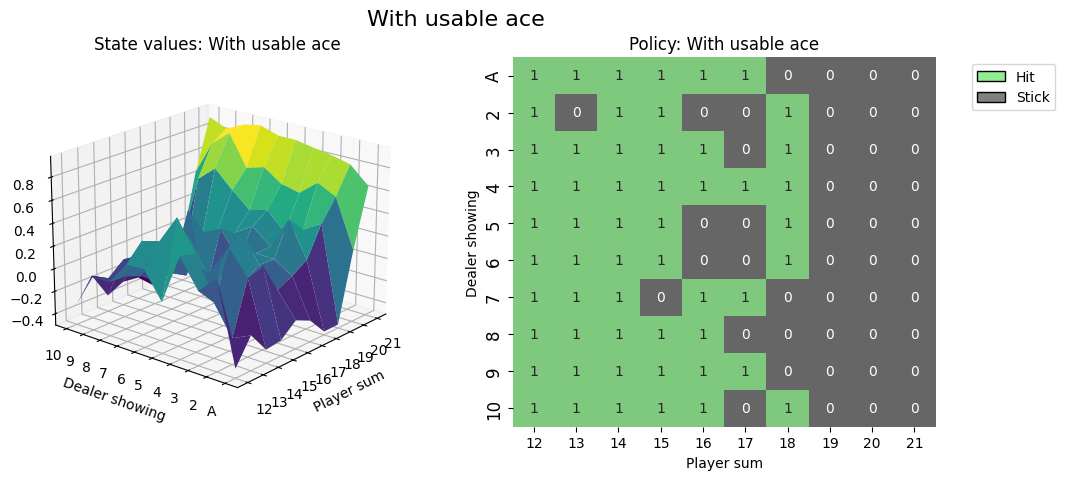

In [11]:
# 0.6
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

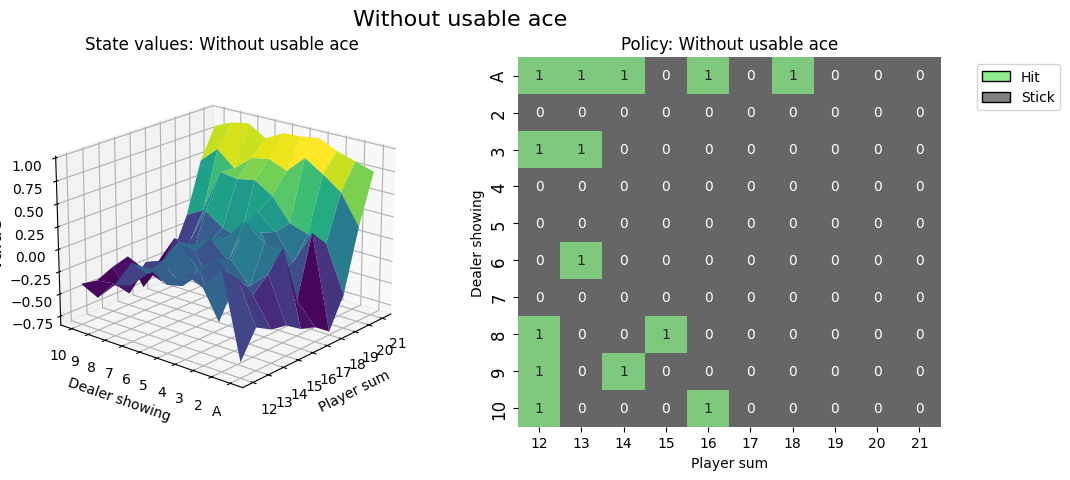

In [12]:
# 0.6
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

In [20]:
q_values = init()
history = []

epsilon = 0.8
eps_decay = .99999
eps_min = 0.05

episodes = 500000

env = Blackjack(17)

for ep in tqdm.trange(episodes):#

  epsilon = max(epsilon*eps_decay, eps_min)

  observations, actions, rewards = generate_episode(epsilon)#
  update_q(q_values, observations, actions, rewards)
  #update_policy(q_values, policy)

  history.append((observations, actions, rewards))

100%|██████████| 500000/500000 [00:56<00:00, 8909.41it/s] 


epsilon = 0.8
alpha = 0.06

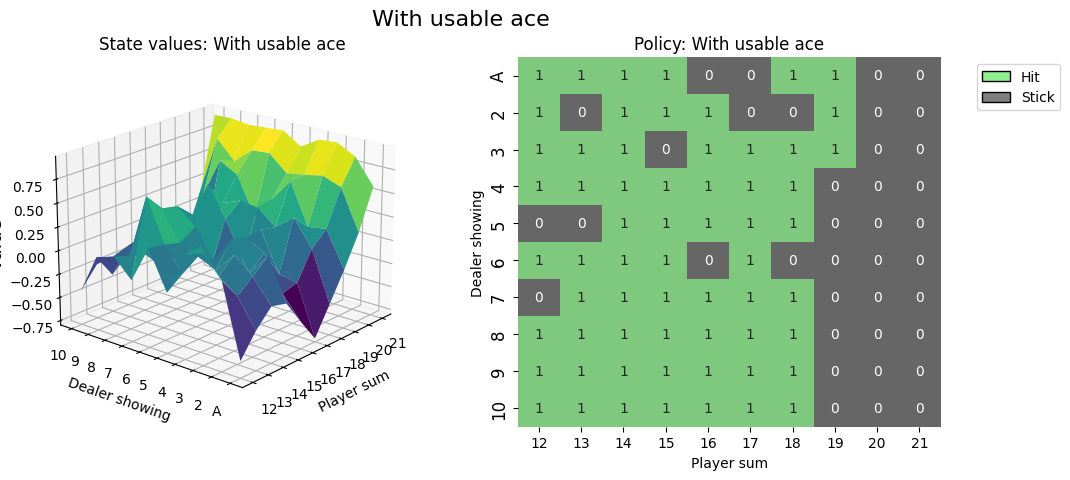

In [14]:
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

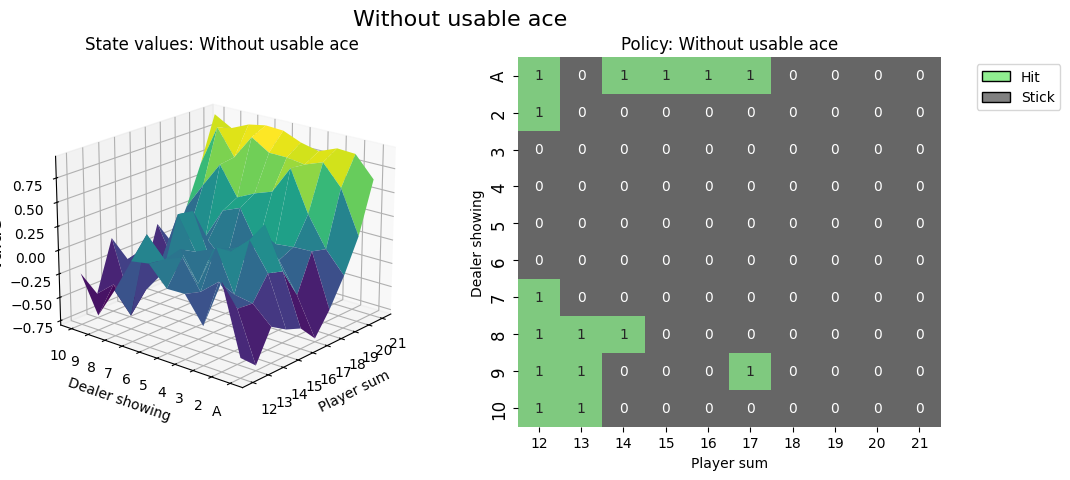

In [15]:
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

epsilon = 1.0
alpha = 0.2

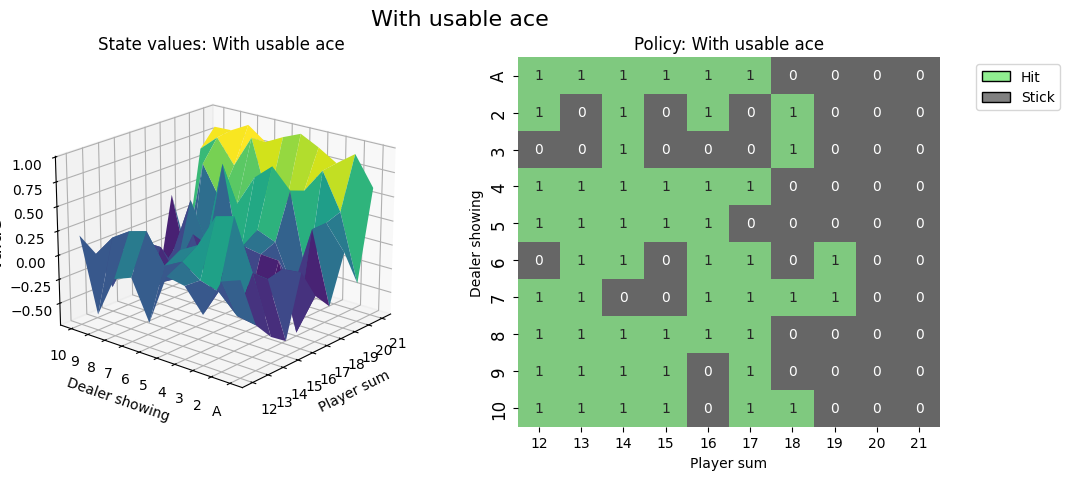

In [18]:
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

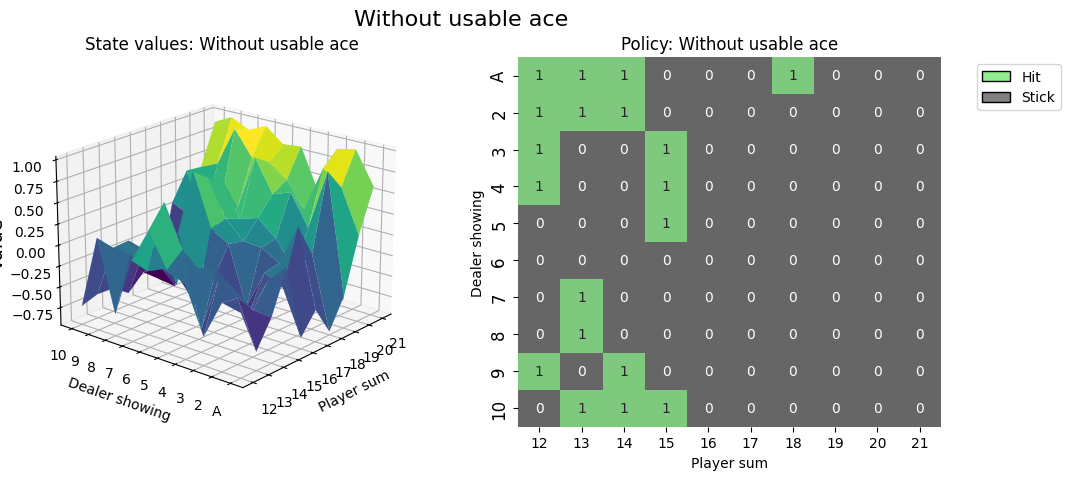

In [19]:
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

epsilon = 0.8
alpha = 0.2

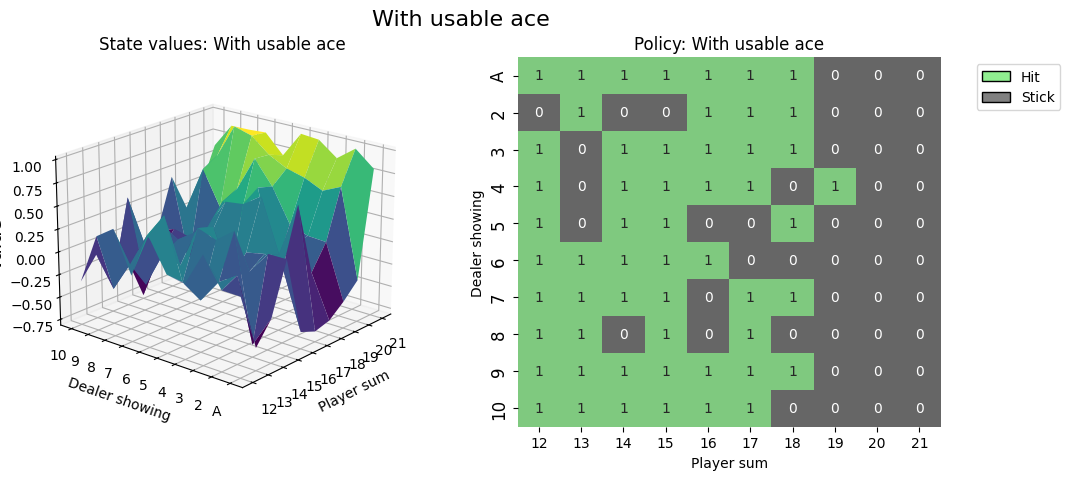

In [21]:
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

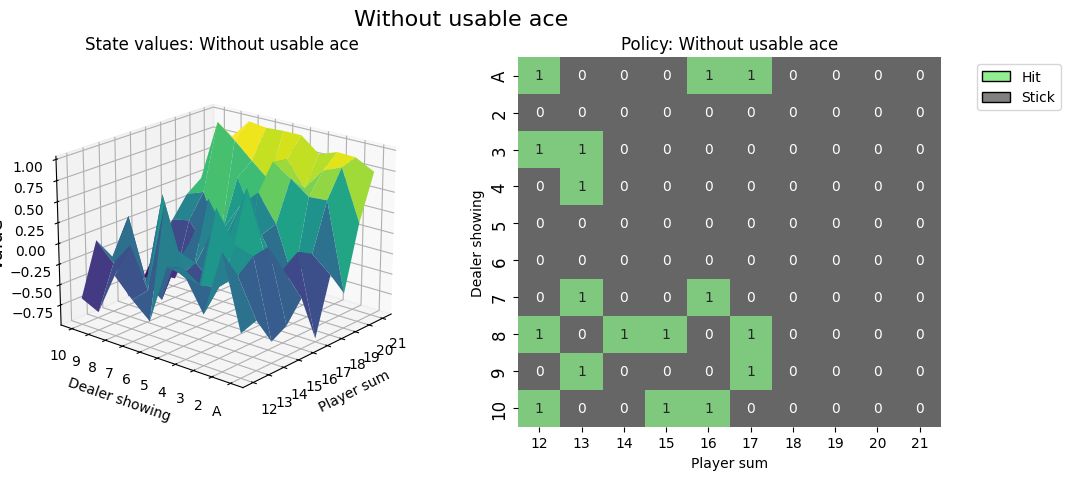

In [22]:
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

epsilon = 1.0
alpha = 1

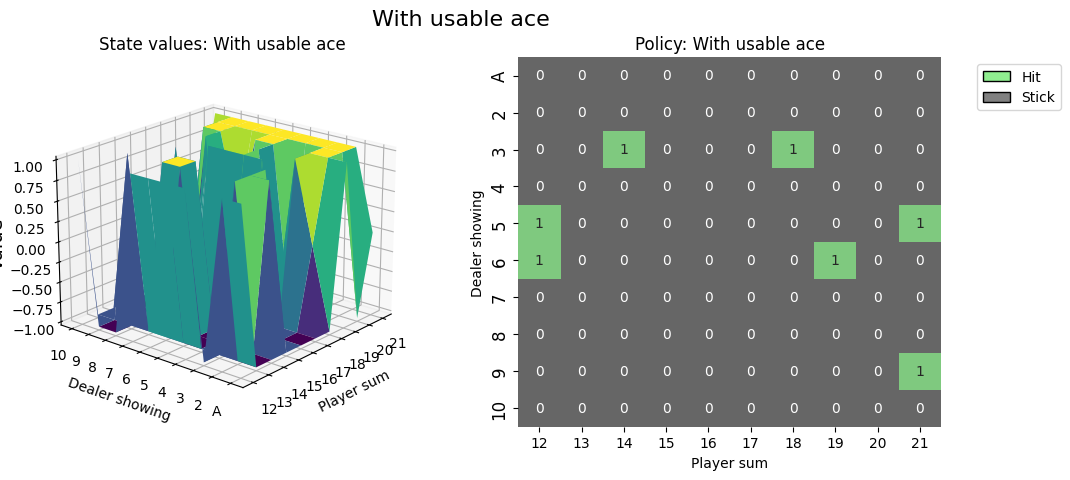

In [25]:
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

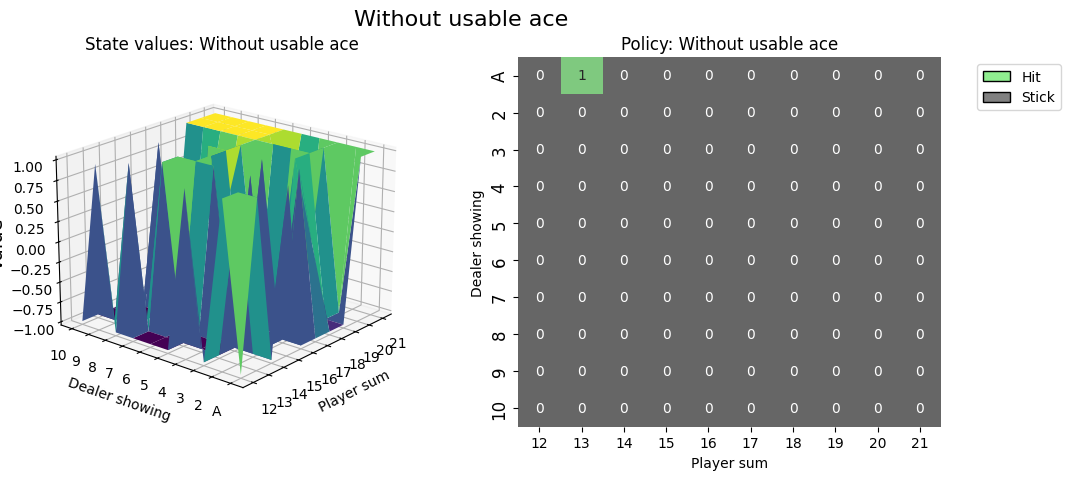

In [26]:
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

Не ну обесценивание точно нужно, иначе дичь получается.

Попробуем уменьшить количество эпизодов

In [28]:
q_values = init()
history = []

epsilon = 1.0
eps_decay = .99999
eps_min = 0.05

episodes = 5000

env = Blackjack(17)

for ep in tqdm.trange(episodes):#

  epsilon = max(epsilon*eps_decay, eps_min)

  observations, actions, rewards = generate_episode(epsilon)#
  update_q(q_values, observations, actions, rewards)
  #update_policy(q_values, policy)

  history.append((observations, actions, rewards))

100%|██████████| 5000/5000 [00:00<00:00, 8305.52it/s]


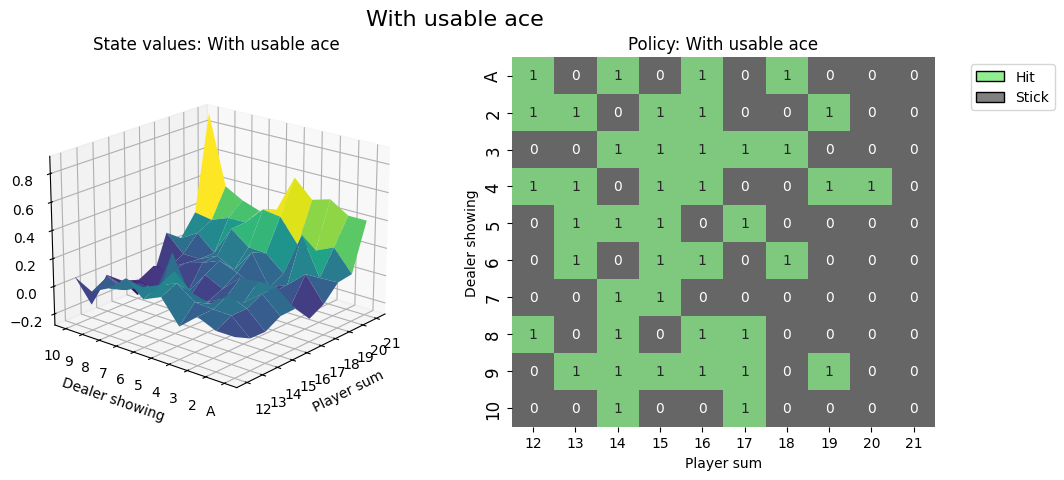

In [29]:
value_grid, policy_grid = create_grids(q_values, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

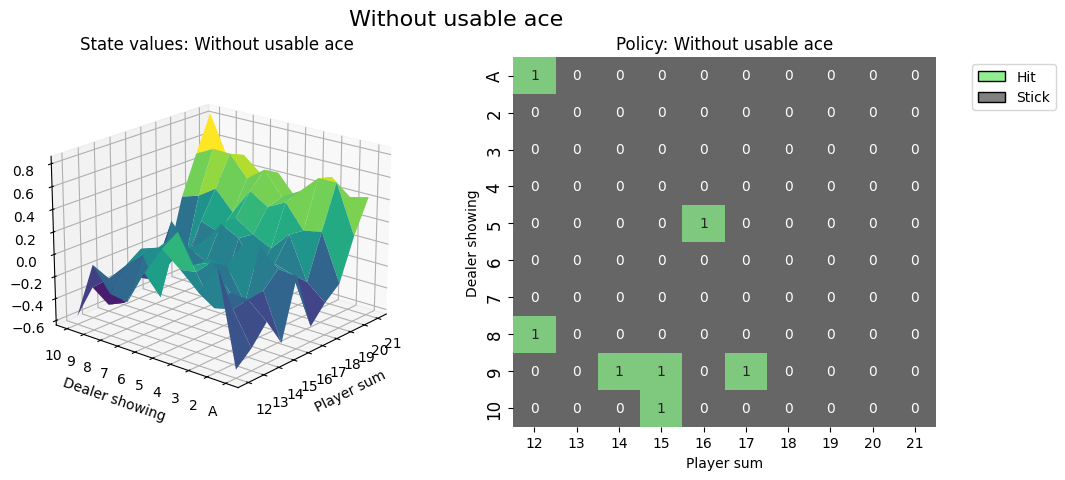

In [30]:
value_grid, policy_grid = create_grids(q_values, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()

Итераций явно не хватает, но картина вырисовывается

### Обсуждение


1.   Попробуйте поэкспериментировать с кодом для игры в блэкджек несколькими вариантами. В-первом посмотреть, что будет, если изменять в течение обучения не только epsilon, но и alpha, а также добавить или убрать обесценивание и общее количество эпизодов. Во-втором попробуйте сделать цикл из многих обучений заданного количества эпиодов и получаемые политики усредните.

In [28]:
episodes = 50000
max_episodes = 1000000
policies = []
iters = 1
max_iters = 10

while(iters <= max_iters):
    q_values = init()
    history = []

    epsilon = 1.0
    eps_decay = .99999
    eps_min = 0.05

    env = Blackjack(17)

    for ep in tqdm.trange(episodes):#
        epsilon = max(epsilon*eps_decay, eps_min)

        observations, actions, rewards = generate_episode(epsilon)#
        update_q(q_values, observations, actions, rewards)
        #update_policy(q_values, policy)
        history.append((observations, actions, rewards))
    
    value_grid, policy_grid = create_grids(q_values, usable_ace=True)
    policies.append(policy_grid)
    iters += 1

100%|██████████| 50000/50000 [00:05<00:00, 8600.46it/s]


In [29]:
mean = sum(policies) / len(policies)

In [30]:
mean

array([[0.2, 0.7, 0.8, 0.4, 0.6, 0.6, 0.7, 0.1, 0. , 0. ],
       [0.6, 0.3, 0.7, 0.4, 0.7, 0.7, 0.2, 0. , 0. , 0. ],
       [0.5, 0.5, 0.6, 0.4, 0.4, 0.4, 0.3, 0. , 0. , 0. ],
       [0.8, 0.7, 0.6, 0.3, 0.2, 0.6, 0.1, 0. , 0. , 0. ],
       [0.6, 0.6, 0. , 0.4, 0.7, 0.3, 0.2, 0.2, 0. , 0. ],
       [0.5, 0.6, 0.7, 0.5, 0.5, 0.3, 0.3, 0.1, 0. , 0. ],
       [0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.1, 0. , 0. , 0. ],
       [0.5, 0.8, 0.7, 0.7, 0.6, 0.8, 0. , 0. , 0. , 0. ],
       [0.7, 0.8, 0.8, 0.8, 0.7, 0.6, 0.4, 0.1, 0. , 0. ],
       [0.6, 0.7, 0.4, 0.6, 0.5, 0.8, 0.5, 0.1, 0. , 0. ]])

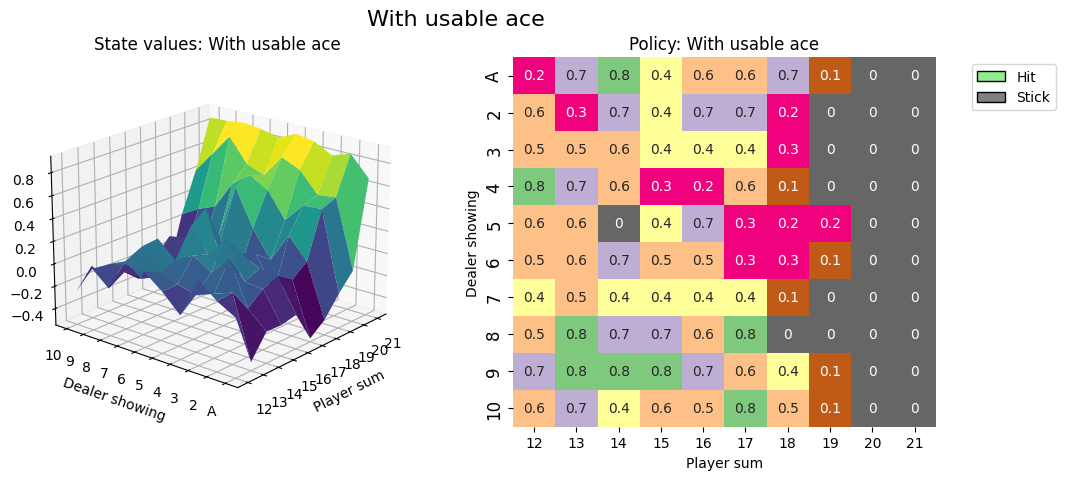

In [31]:
fig1 = create_plots(value_grid, mean, title="With usable ace")
plt.show()

## Методы с разделенной стратегией
>Все методы управления обучением сталкиваются с дилеммой: требуется обучить ценности действий при условии последующего оптимального поведения, но чтобы исследовать все действия, приходится вести себя неоптимально.


Методы с единой стратегией фактически представляют собой компромисс – они обучаются ценности действий не для оптимальной стратегии, а для почти оптимальной, которая все еще занимается исследованием. Отсюда все $ε$-мягкие стратегии, распределения вероятностей больше нуля и прочие ухищрения.

Более прямолинейный подход - **<font color='orange'>обучение с разделенной стратегией (off-policy learning)</font>**. В этом случае мы будем **<font color='orange'>использовать две стратегии</font>**: **<font color='orange'>целевую</font>**, которую будем улучшать, делая оптимальной, и **<font color='orange'>поведенческую</font>** – исследовательскую, служащую для генерации поведения.

Вообще, методы с единой стратегией проще как для понимания, так и для программирования. С другой стороны, методы с разделенной стратегией – более мощные и общие, так как включают методы с единой стратегией в качестве частного случая (поведенческая стратегия совпадает с целевой). Однако, для их изучения необходимы дополнительные понятия и обозначения, а поскольку данные связаны с другой стратегией, то off-policy методы обычно обладают большей дисперсией и сходятся медленнее. Более подробно разницу off-policy и on-policy мы разберем в 6 лекции с бутстрэппингом. Текущего понимания происходящего пока достаточно.

In [ ]:
output.eval_js('new Audio("https://static.wikia.nocookie.net/allstars_gamepedia/images/c/c4/ChoBase_WaitingForGall00.ogg").play()')